In [349]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [350]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


In [351]:
fpath = 'family_data.csv'
data = pd.read_csv(fpath, index_col='family_id')

fpath = 'sample_submission.csv'
submission = pd.read_csv(fpath, index_col='family_id')

In [352]:
data.head()

,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
family_id,,,,,,,,,,,
0,52,38,12,82,33,75,64,76,10,28,4
1,26,4,82,5,11,47,38,6,66,61,4
2,100,54,25,12,27,82,10,89,80,33,3
3,2,95,1,96,32,6,40,31,9,59,2
4,53,1,47,93,26,3,46,16,42,39,4


In [353]:
submission.head()

,assigned_day
family_id,
0,100
1,99
2,98
3,97
4,96


In [354]:
columns = list(data.columns)[1:11]
preference = []

for index in submission.index:
    day = submission.loc[index].values[0]
    temp_list = list(data.loc[index,columns].values) #loc gets column values at the specific index
    if day not in temp_list:
        preference.append(10)
    else:
        preference.append(int(temp_list.index(day)))

In [355]:
submission['preference'] = preference
submission['n_people'] = data['n_people']

In [356]:
submission[submission['preference'] == 10]

,assigned_day,preference,n_people
family_id,,,
0,100,10,4
1,99,10,4
2,98,10,3
3,97,10,2
4,96,10,4
...,...,...,...
4994,6,10,4
4995,5,10,4
4996,4,10,2


In [357]:
# Given cost function for families not getting their desired preferences
def top_pref_penalty(pref,d):
    
    penalty = 0
    n = pref
    
    d = d
    if pref > 0:
        if d == 0:
            penalty += 0
        elif d == 1:
            penalty += 50
        elif d == 2:
            penalty += 50 + 9 * n
        elif d == 3:
            penalty += 100 + 9 * n
        elif d == 4:
            penalty += 200 + 9 * n
        elif d == 5:
            penalty += 200 + 18 * n
        elif d == 6:
            penalty += 300 + 18 * n
        elif d == 7:
            penalty += 300 + 36 * n
        elif d == 8:
            penalty += 400 + 36 * n
        elif d == 9:
            penalty += 500 + 36 * n + 199 * n
        else:
            penalty += 500 + 36 * n + 398 * n
    else:
        pass
        
    return penalty

In [358]:
pref_0 = submission[submission['preference'] == 0]
pref_0 = list(pref_0[['assigned_day','n_people']].groupby('assigned_day').sum()['n_people'].values)

pref_1 = submission[submission['preference'] == 1]
pref_1 = list(pref_1[['assigned_day','n_people']].groupby('assigned_day').sum()['n_people'].values)

pref_2 = submission[submission['preference'] == 2]
pref_2 = list(pref_2[['assigned_day','n_people']].groupby('assigned_day').sum()['n_people'].values)

pref_3 = submission[submission['preference'] == 3]
pref_3 = list(pref_3[['assigned_day','n_people']].groupby('assigned_day').sum()['n_people'].values)

pref_4 = submission[submission['preference'] == 4]
pref_4 = list(pref_4[['assigned_day','n_people']].groupby('assigned_day').sum()['n_people'].values)

pref_5 = submission[submission['preference'] == 5]
pref_5 = list(pref_5[['assigned_day','n_people']].groupby('assigned_day').sum()['n_people'].values)

pref_6 = submission[submission['preference'] == 6]
pref_6 = list(pref_6[['assigned_day','n_people']].groupby('assigned_day').sum()['n_people'].values)

pref_7 = submission[submission['preference'] == 7]
pref_7 = list(pref_7[['assigned_day','n_people']].groupby('assigned_day').sum()['n_people'].values)

pref_8 = submission[submission['preference'] == 8]
pref_8 = list(pref_8[['assigned_day','n_people']].groupby('assigned_day').sum()['n_people'].values)

pref_9 = submission[submission['preference'] == 9]
pref_9 = list(pref_9[['assigned_day','n_people']].groupby('assigned_day').sum()['n_people'].values)

pref_10 = submission[submission['preference'] == 10]
pref_10 = list(pref_10[['assigned_day','n_people']].groupby('assigned_day').sum()['n_people'].values)

In [360]:
def pref_count(df,pref):
    
    if pref == 11:
        pref_df = df[['assigned_day','n_people']].groupby('assigned_day').sum()
    else:
        pref_df = df[df['preference'] == pref][['assigned_day','n_people']].groupby('assigned_day').sum()
    
    count = [0]*100

    for index,row in pref_df.iterrows():
        index = index - 1
        count[index] = row['n_people']

    return count

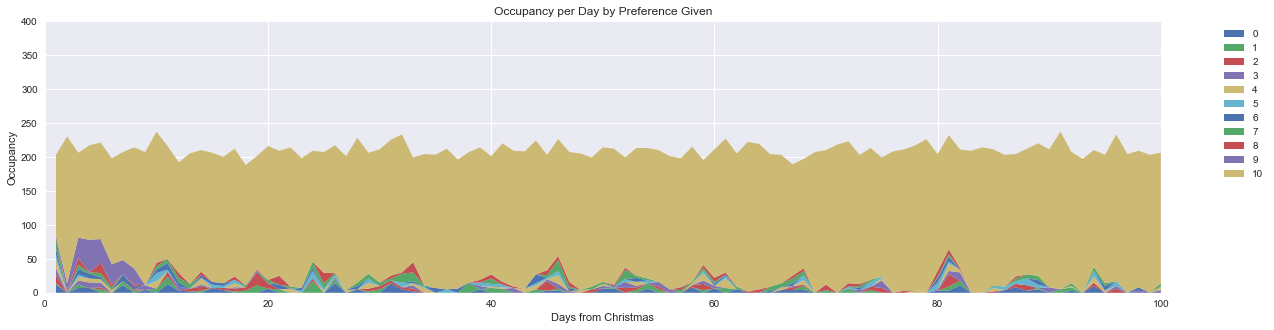

In [361]:
plt.close('all')
plt.style.use('seaborn')

# Labels for stacked plot
labels = list(np.sort(submission.preference.unique()))

# Creating individual lists for each preference (required for stacked plot)
pref_0 = pref_count(submission,0)
pref_1 = pref_count(submission,1)
pref_2 = pref_count(submission,2)
pref_3 = pref_count(submission,3)
pref_4 = pref_count(submission,4)
pref_5 = pref_count(submission,5)
pref_6 = pref_count(submission,6)
pref_7 = pref_count(submission,7)
pref_8 = pref_count(submission,8)
pref_9 = pref_count(submission,9)
pref_10 = pref_count(submission,10)

# Getting days from Occupancy dataframe
x = list(range(1,101))

# Setting figure
fig, ax = plt.subplots(figsize=(20,5))

# Formatting plot area
ax.set_xlabel('Days from Christmas')
ax.set_ylabel('Occupancy')
ax.set_ylim(0,400)
ax.set_xlim(0,100)

# Creating plot
ax.stackplot(x,pref_0,pref_1,pref_2,pref_3,pref_4,pref_5,pref_6,pref_7,pref_8,pref_9,pref_10,labels=labels)
ax.legend(loc=1,bbox_to_anchor=(1.1, 1))
ax.set_title('Occupancy per Day by Preference Given')

plt.show()

In [362]:
# Given cost function for families not getting their desired preferences
def top_pref_penalty(pref,n):
    
    penalty = 0
    d = pref
    
    if pref > 0:
        if d == 0:
            penalty += 0
        elif d == 1:
            penalty += 50
        elif d == 2:
            penalty += 50 + 9 * n
        elif d == 3:
            penalty += 100 + 9 * n
        elif d == 4:
            penalty += 200 + 9 * n
        elif d == 5:
            penalty += 200 + 18 * n
        elif d == 6:
            penalty += 300 + 18 * n
        elif d == 7:
            penalty += 300 + 36 * n
        elif d == 8:
            penalty += 400 + 36 * n
        elif d == 9:
            penalty += 500 + 36 * n + 199 * n
        else:
            penalty += 500 + 36 * n + 398 * n
    else:
        pass
        
    return penalty

In [363]:
submission['pref_pen'] = 0
submission['pref_pen'] = submission.apply(lambda x: top_pref_penalty(x['preference'],x['n_people']),axis=1)

In [364]:
submission.head()

,assigned_day,preference,n_people,pref_pen
family_id,,,,
0,100,10,4,2236
1,99,10,4,2236
2,98,10,3,1802
3,97,10,2,1368
4,96,10,4,2236


In [365]:
occupancy = pd.DataFrame()
occupancy['daily_vol'] = pref_count(submission,11)
occupancy['acct_cost'] = 100000
occupancy.index += 1

In [366]:
# First day is special
occupancy.loc[days[0]]['acct_cost'] = (occupancy.loc[days[0]]['daily_vol']-125.0) / 400.0 *\
                                       occupancy.loc[days[0]]['daily_vol']**(0.5)

days = list(range(100,0,-1))

# Loop over the rest of the days, keeping track of previous count
yesterday_count = occupancy.loc[days[0]]['daily_vol']
for day in days[1:]:
    
    today_count = occupancy.loc[day]['daily_vol']
    diff = abs(today_count - yesterday_count)
    occupancy.loc[day]['acct_cost'] = max(0., (occupancy.loc[day]['daily_vol']-125.0) / 400.0 *\
                                              occupancy.loc[day]['daily_vol']**(0.5 + diff / 50.0))
    yesterday_count = today_count

In [367]:
occupancy.head()

,daily_vol,acct_cost
1,203,48
2,230,54
3,206,9
4,217,5
5,221,42


In [368]:
data[columns].head()

,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
family_id,,,,,,,,,,
0,38,12,82,33,75,64,76,10,28,4
1,4,82,5,11,47,38,6,66,61,4
2,54,25,12,27,82,10,89,80,33,3
3,95,1,96,32,6,40,31,9,59,2
4,1,47,93,26,3,46,16,42,39,4


In [369]:
submission2 = submission.copy()
columns = ['choice_0','choice_1','choice_2','choice_3','choice_4',\
           'choice_5','choice_6','choice_7','choice_8','choice_9']

max_count = 225 # Setting this too may not allow you to add ideal preferences to the right days due to daily limits
min_count = 125
max_daily_change = 30

for index,row in submission2.iterrows():
    pref = 0
    
    occupancy = pd.DataFrame()
    occupancy['daily_vol'] = pref_count(submission2,11)
    occupancy.index += 1
    
    current_day = row['assigned_day']
    
    if row['assigned_day'] == 100:
        prev_day = 100
    else:
        prev_day = row['assigned_day'] + 1
    
    for day in list(data[columns].loc[index].values):
        
        if day == 100: # Skipping preference of Day 0 for now
            prev_day_selection = 100
        else:
            prev_day_selection = day+1
            
            
        if occupancy.loc[day]['daily_vol'] + row['n_people'] <= max_count and\
            occupancy.loc[current_day]['daily_vol'] - row['n_people'] >= min_count and\
            abs(occupancy.loc[current_day]['daily_vol'] - row['n_people'] - occupancy.loc[prev_day]['daily_vol']) <= max_daily_change and\
            abs(occupancy.loc[day]['daily_vol'] + row['n_people'] - occupancy.loc[prev_day_selection]['daily_vol']) <= max_daily_change:

            submission2.loc[index]['assigned_day'] = day
            submission2.loc[index]['preference'] = pref

            break

        else:
            pref += 1
            pass

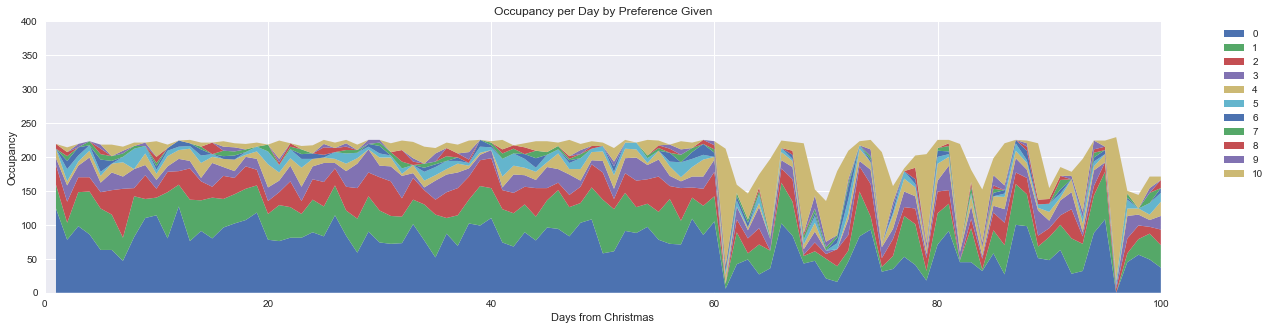

In [370]:
plt.close('all')
plt.style.use('seaborn')

# Labels for stacked plot
labels = list(np.sort(submission2.preference.unique()))

# Creating individual lists for each preference (required for stacked plot)
pref_0 = pref_count(submission2,0)
pref_1 = pref_count(submission2,1)
pref_2 = pref_count(submission2,2)
pref_3 = pref_count(submission2,3)
pref_4 = pref_count(submission2,4)
pref_5 = pref_count(submission2,5)
pref_6 = pref_count(submission2,6)
pref_7 = pref_count(submission2,7)
pref_8 = pref_count(submission2,8)
pref_9 = pref_count(submission2,9)
pref_10 = pref_count(submission2,10)

# Getting days from Occupancy dataframe
x = list(range(1,101))

# Setting figure
fig, ax1 = plt.subplots(figsize=(20,5))

# Formatting plot area
ax1.set_xlabel('Days from Christmas')
ax1.set_ylabel('Occupancy')
ax1.set_ylim(0,400)
ax1.set_xlim(0,100)

# Creating plot
ax1.stackplot(x,pref_0,pref_1,pref_2,pref_3,pref_4,pref_5,pref_6,pref_7,pref_8,pref_9,pref_10,labels=labels)
ax1.legend(loc=1,bbox_to_anchor=(1.1, 1))
ax1.set_title('Occupancy per Day by Preference Given')

plt.show()

In [371]:
submission2['pref_pen'] = submission2.apply(lambda x: top_pref_penalty(x['preference'],x['n_people']),axis=1)

occupancy = pd.DataFrame()
occupancy['daily_vol'] = pref_count(submission2,11)
occupancy['acct_cost'] = 10000000
occupancy.index += 1

days = list(range(100,0,-1))

# First day is special
occupancy.loc[days[0]]['acct_cost'] = (occupancy.loc[days[0]]['daily_vol']-125.0) / 400.0 *\
                                       occupancy.loc[days[0]]['daily_vol']**(0.5)

# Loop over the rest of the days, keeping track of previous count
yesterday_count = occupancy.loc[days[0]]['daily_vol']
for day in days[1:]:
    
    today_count = occupancy.loc[day]['daily_vol']
    diff = abs(today_count - yesterday_count)
    occupancy.loc[day]['acct_cost'] = max(0., (occupancy.loc[day]['daily_vol']-125.0) / 400.0 *\
                                              occupancy.loc[day]['daily_vol']**(0.5 + diff / 50.0))
    yesterday_count = today_count

In [372]:
occupancy.head()

,daily_vol,acct_cost
1,219,5
2,214,5
3,219,5
4,223,6
5,218,3


In [373]:
score = submission2['pref_pen'].sum() + occupancy['acct_cost'].sum()

submission2[['assigned_day']].to_csv(f'submission_{score}.csv')
print('{0:,}'.format(score))

1,715,051


In [303]:
# is this a duplicate run?

submission2 = submission.copy()
columns = ['choice_0','choice_1','choice_2','choice_3','choice_4',\
           'choice_5','choice_6','choice_7','choice_8','choice_9']

for index,row in submission2.iterrows():
    pref = 0
    
    occupancy = pd.DataFrame()
    occupancy['daily_vol'] = pref_count(submission2,11)
    occupancy.index += 1
    
    current_day = row['assigned_day']
    
    if row['assigned_day'] == 100:
        prev_day = 100
    else:
        prev_day = row['assigned_day'] + 1
    
    for day in list(data[columns].loc[index].values):
        
        if day == 100: # Skipping preference of Day 0 for now
            prev_day_selection = 100
        else:
            prev_day_selection = day+1
            
        if occupancy.loc[day]['daily_vol'] + row['n_people'] <= 300 and\
            occupancy.loc[current_day]['daily_vol'] - row['n_people'] >= 125 and\
            abs(occupancy.loc[current_day]['daily_vol'] - row['n_people'] - occupancy.loc[prev_day]['daily_vol']) <= 30 and\
            abs(occupancy.loc[day]['daily_vol'] + row['n_people'] - occupancy.loc[prev_day_selection]['daily_vol']) <= 30:

            submission2.loc[index]['assigned_day'] = day
            submission2.loc[index]['preference'] = pref

            break

        else:
            pref += 1
            pass

In [374]:
def cost_function(prediction):

    penalty = 0

    # We'll use this to count the number of people scheduled each day
    daily_occupancy = {k:0 for k in days}

    # Looping over each family; d is the day for each family f
    for f, d in enumerate(prediction):

        # Using our lookup dictionaries to make simpler variable names
        n = family_size_dict[f]
        choice_0 = choice_dict['choice_0'][f]
        choice_1 = choice_dict['choice_1'][f]
        choice_2 = choice_dict['choice_2'][f]
        choice_3 = choice_dict['choice_3'][f]
        choice_4 = choice_dict['choice_4'][f]
        choice_5 = choice_dict['choice_5'][f]
        choice_6 = choice_dict['choice_6'][f]
        choice_7 = choice_dict['choice_7'][f]
        choice_8 = choice_dict['choice_8'][f]
        choice_9 = choice_dict['choice_9'][f]

        # add the family member count to the daily occupancy
        daily_occupancy[d] += n

        # Calculate the penalty for not getting top preference
        if d == choice_0:
            penalty += 0
        elif d == choice_1:
            penalty += 50
        elif d == choice_2:
            penalty += 50 + 9 * n
        elif d == choice_3:
            penalty += 100 + 9 * n
        elif d == choice_4:
            penalty += 200 + 9 * n
        elif d == choice_5:
            penalty += 200 + 18 * n
        elif d == choice_6:
            penalty += 300 + 18 * n
        elif d == choice_7:
            penalty += 300 + 36 * n
        elif d == choice_8:
            penalty += 400 + 36 * n
        elif d == choice_9:
            penalty += 500 + 36 * n + 199 * n
        else:
            penalty += 500 + 36 * n + 398 * n

    # for each date, check total occupancy
    #  (using soft constraints instead of hard constraints)
    for _, v in daily_occupancy.items():
        if (v > MAX_OCCUPANCY) or (v < MIN_OCCUPANCY):
            penalty += 100000000

    # Calculate the accounting cost
    # The first day (day 100) is treated special
    accounting_cost = (daily_occupancy[days[0]]-125.0) / 400.0 * daily_occupancy[days[0]]**(0.5)
    # using the max function because the soft constraints might allow occupancy to dip below 125
    accounting_cost = max(0, accounting_cost)
    
    # Loop over the rest of the days, keeping track of previous count
    yesterday_count = daily_occupancy[days[0]]
    for day in days[1:]:
        today_count = daily_occupancy[day]
        diff = abs(today_count - yesterday_count)
        accounting_cost += max(0, (daily_occupancy[day]-125.0) / 400.0 * daily_occupancy[day]**(0.5 + diff / 50.0))
        yesterday_count = today_count

    penalty += accounting_cost

    return penalty

In [375]:
family_size_dict = data[['n_people']].to_dict()['n_people']

cols = [f'choice_{i}' for i in range(10)]
choice_dict = data[cols].to_dict()

N_DAYS = 100
MAX_OCCUPANCY = 300
MIN_OCCUPANCY = 125

# from 100 to 1
days = list(range(N_DAYS,0,-1))

In [376]:
# Start with the sample submission values
best = submission2['assigned_day'].tolist()
start_score = cost_function(best)

new = best.copy()
# loop over each family
for fam_id, _ in enumerate(best):
    # loop over each family choice
    for pick in range(10):
        day = choice_dict[f'choice_{pick}'][fam_id]
        temp = new.copy()
        temp[fam_id] = day # add in the new pick
        if cost_function(temp) < start_score:
            new = temp.copy()
            start_score = cost_function(new)

submission2['assigned_day'] = new
score = cost_function(new)
# submission2.to_csv(f'submission_{score}.csv')
print(f'Score: {score}')

Score: 345221.99748188385


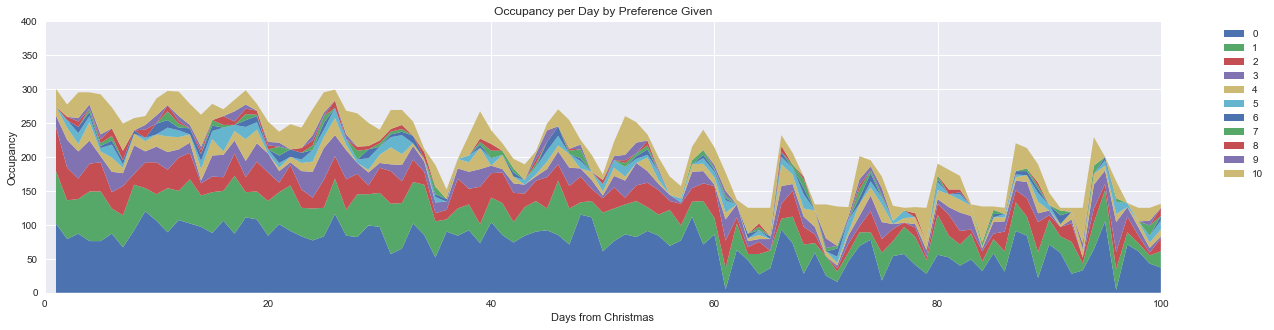

In [377]:
plt.close('all')
plt.style.use('seaborn')

# Labels for stacked plot
labels = list(np.sort(submission2.preference.unique()))

# Creating individual lists for each preference (required for stacked plot)
pref_0 = pref_count(submission2,0)
pref_1 = pref_count(submission2,1)
pref_2 = pref_count(submission2,2)
pref_3 = pref_count(submission2,3)
pref_4 = pref_count(submission2,4)
pref_5 = pref_count(submission2,5)
pref_6 = pref_count(submission2,6)
pref_7 = pref_count(submission2,7)
pref_8 = pref_count(submission2,8)
pref_9 = pref_count(submission2,9)
pref_10 = pref_count(submission2,10)

# Getting days from Occupancy dataframe
x = list(range(1,101))

# Setting figure
fig, ax1 = plt.subplots(figsize=(20,5))

# Formatting plot area
ax1.set_xlabel('Days from Christmas')
ax1.set_ylabel('Occupancy')
ax1.set_ylim(0,400)
ax1.set_xlim(0,100)

# Creating plot
ax1.stackplot(x,pref_0,pref_1,pref_2,pref_3,pref_4,pref_5,pref_6,pref_7,pref_8,pref_9,pref_10,labels=labels)
ax1.legend(loc=1,bbox_to_anchor=(1.1, 1))
ax1.set_title('Occupancy per Day by Preference Given')

plt.show()

In [378]:
# Iterate to lower the cost
for i in range(100):

    best = submission2['assigned_day'].tolist()
    start_score = cost_function(best)

    new = best.copy()
    # loop over each family
    for fam_id, _ in enumerate(best):
        # loop over each family choice
        for pick in range(10):
            day = choice_dict[f'choice_{pick}'][fam_id]
            temp = new.copy()
            temp[fam_id] = day # add in the new pick
            if cost_function(temp) < start_score:
                new = temp.copy()
                start_score = cost_function(new)

    submission2['assigned_day'] = new
    score = cost_function(new)
#     submission2[['assigned_day']].to_csv(f'submission_{score}.csv')
    print(f'Score: {score}')

Score: 320054.82496985514
Score: 308154.9550086715
Score: 304093.5117400391
Score: 300524.38207013306
Score: 295096.1093999672
Score: 294464.6106892287
Score: 293757.63748142606
Score: 293191.59252134565
Score: 292439.68334239
Score: 291417.43739517825
Score: 291056.76041192125
Score: 290613.9282614188
Score: 290371.8411320929
Score: 290286.8410284565
Score: 290263.57220263773
Score: 290263.57220263773
Score: 290263.57220263773
Score: 290263.57220263773


KeyboardInterrupt: 

In [379]:
score

290263.57220263773

In [393]:
list_1 = []
for ind,row in submission2.iterrows():
    if row['assigned_day'] == data.iloc[ind,-10]:
        list_1.append(ind)
        
# Lets try to improve score by working on family with otherwise date assigned
best = submission2['assigned_day'].tolist()
start_score = score # Update with previous best score from above

new = best.copy()
# loop over each family
for _, fam_id in enumerate(list_1):
    # loop over each family choice
    for pick in range(10):
        day = choice_dict[f'choice_{pick}'][fam_id]
        temp = new.copy()
        temp[fam_id] = day # add in the new pick
        if cost_function(temp) < start_score:
            new = temp.copy()
            start_score = cost_function(new)

submission2['assigned_day'] = new
score = cost_function(new)

#submission.to_csv(f'submission_{score}.csv')
print(f'Score: {score}')

Score: 290263.57220263773


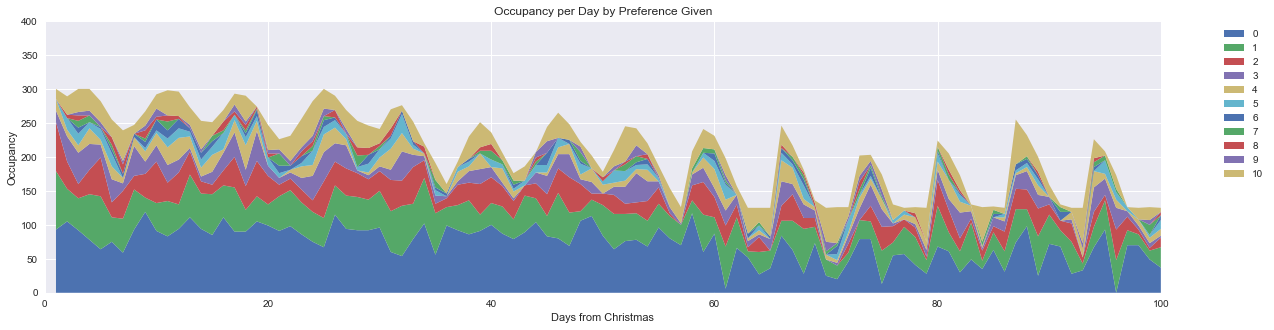

In [394]:
plt.close('all')
plt.style.use('seaborn')

# Labels for stacked plot
labels = list(np.sort(submission2.preference.unique()))

# Creating individual lists for each preference (required for stacked plot)
pref_0 = pref_count(submission2,0)
pref_1 = pref_count(submission2,1)
pref_2 = pref_count(submission2,2)
pref_3 = pref_count(submission2,3)
pref_4 = pref_count(submission2,4)
pref_5 = pref_count(submission2,5)
pref_6 = pref_count(submission2,6)
pref_7 = pref_count(submission2,7)
pref_8 = pref_count(submission2,8)
pref_9 = pref_count(submission2,9)
pref_10 = pref_count(submission2,10)

# Getting days from Occupancy dataframe
x = list(range(1,101))

# Setting figure
fig, ax1 = plt.subplots(figsize=(20,5))

# Formatting plot area
ax1.set_xlabel('Days from Christmas')
ax1.set_ylabel('Occupancy')
ax1.set_ylim(0,400)
ax1.set_xlim(0,100)

# Creating plot
ax1.stackplot(x,pref_0,pref_1,pref_2,pref_3,pref_4,pref_5,pref_6,pref_7,pref_8,pref_9,pref_10,labels=labels)
ax1.legend(loc=1,bbox_to_anchor=(1.1, 1))
ax1.set_title('Occupancy per Day by Preference Given')

plt.show()

In [395]:
score

290263.57220263773

In [338]:
submission2[['assigned_day']].to_csv(f'submission_{score}.csv')

## Last thing to try is to run backwards through bad preferences and see if we can improve
#### We should not have any preferencd 10 on Day 1, there are just too many Pref 0 with Day 1